In [ ]:
# importing package
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from numpy.linalg import eig  

In [ ]:
# defining a simple data 
marks = np.array([[3,4], [2,8], [6,9]])
print(marks)

[[3 4]
 [2 8]
 [6 9]]


In [ ]:
# make a data frame
marks_fm = pd.DataFrame(marks,columns=['Bangla','english'])
marks_fm

,Bangla,english
0,3,4
1,2,8
2,6,9


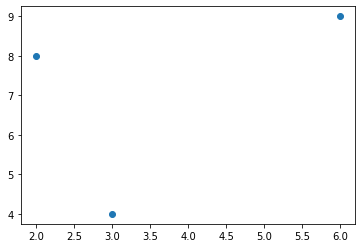

In [ ]:
plt.scatter(marks_fm['Bangla'],marks_fm['english'])

In [ ]:
meanbycolumn = np.mean(marks.T, axis=1) 
print(meanbycolumn) 
ScaledData = marks - meanbycolumn

[3.66666667 7.        ]


In [ ]:
marks.T

array([[3, 2, 6],
       [4, 8, 9]])

In [ ]:
ScaledData

array([[-0.66666667, -3.        ],
       [-1.66666667,  1.        ],
       [ 2.33333333,  2.        ]])

In [19]:
# find the covaricene matrix of the scaled data
covmat = np.cov(ScaledData.T)
covmat

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [23]:
# find the corresponding eigen value and eigen vector of abvoe covariance matrix
eval, evec =eig(covmat)
print(eval)
print(evec)

[2.83333333 8.5       ]
[[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [24]:
# get original data projected to principal componeents as new axis
projectedData = evec.T.dot(ScaledData.T)
print(projectedData)

[[-9.71825316e-01  1.94365063e+00 -9.71825316e-01]
 [ 2.91547595e+00  1.11022302e-16 -2.91547595e+00]]


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(marks)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-7.37588530e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [26]:
# variance explanation ratio by each PC
pca.explained_variance_ratio_

array([0.75, 0.25])

In [27]:
# DataFrame for pca
pcdf = pd.DataFrame(data =pca.fit_transform(marks), columns=['pc1','pc2'])
pcdf


,pc1,pc2
0,2.915476e+00,-0.971825
1,-7.375885e-16,1.943651
2,-2.915476e+00,-0.971825


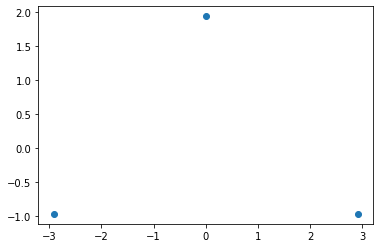

In [28]:
plt.scatter(pcdf['pc1'], pcdf['pc2'])

In [30]:
# how much weight each variable has in principal components
loadingWeight = pd.DataFrame(pca.components_.T, columns=['pc1','pc2'], index=['bangla', 'english'])
loadingWeight

,pc1,pc2
bangla,-0.514496,-0.857493
english,-0.857493,0.514496


In [31]:
# inverse transform
pca.inverse_transform(pca.fit_transform(marks))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])